In [2]:
import tensorflow as tf  # Библиотека для создания и обучения(тренировки) нейронных сетей
import pandas as pd  # Библиотека для работы с таблицами данных (как в Excel)
import numpy as np  # Библиотека для работы с числами(и математикой) и массивами данных
import matplotlib.pyplot as plt  # Библиотека для создания графиков
from sklearn.metrics import classification_report  # Функция для оценки качества модели (точность, полнота и т.д.)
from sklearn.metrics import confusion_matrix  # Функция для построения матрицы ошибок (показывает, где модель ошиблась)
import seaborn as sns  # Библиотека для создания красивых графиков и визуализаций данных

In [3]:
# код загружает набор данных Fashion MNIST, который содержит картинки одежды
fashion_mnist = tf.keras.datasets.fashion_mnist # подключаем набор данных с одеждой
# загружаем картинки и их названия. Есть картинки для тренировки (train_images) и для проверки (test_images).
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Мы загрузили картинки одежды и будем учить нашу нейронную сеть их распознавать.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Эти названия (class_names) соответствуют меткам, которые уже есть в наборе данных
# Fashion MNIST https://www.kaggle.com/datasets/zalando-research/fashionmnist.
# Когда мы загружаем данные, каждое изображение в наборе имеет номер (метку),
# который соответствует одному из этих видов одежды:
# Метка 0 — это 'T-shirt/top' ..
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',  # Названия классов одежды
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # Всего 10 видов одежды
# Таким образом, мы просто написали слова, чтобы было понятно, как называется каждый вид одежды, вместо чисел.

num_classes = len(class_names)  # Считаем, сколько у нас классов (видов одежды)
# Мы подсчитали, что у нас есть 10 разных видов одежды. Это число важно, чтобы знать, сколько разных категорий наша нейронная сеть должна распознавать.
num_classes

10

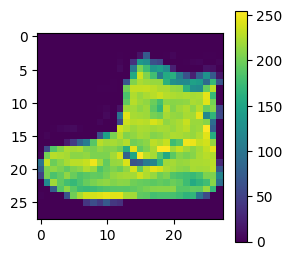

Ankle boot


In [5]:
# Мы хотим увидеть, как выглядит первая картинка из набора данных и узнать, какой вид одежды на этой картинке.

plt.figure(figsize=(3,3))  # Создаём новое окно для графика с размером 3x3 дюйма
plt.imshow(train_images[0])  # Показываем первую картинку из тренировочных данных
plt.colorbar()  # Добавляем цветовую шкалу для картинки
plt.grid(False)  # Убираем сетку на картинке
plt.show()  # Показываем картинку
print(class_names[train_labels[0]])  # Печатаем название класса для первой картинки

# Мы увидим картинку и узнаем, что это за одежда

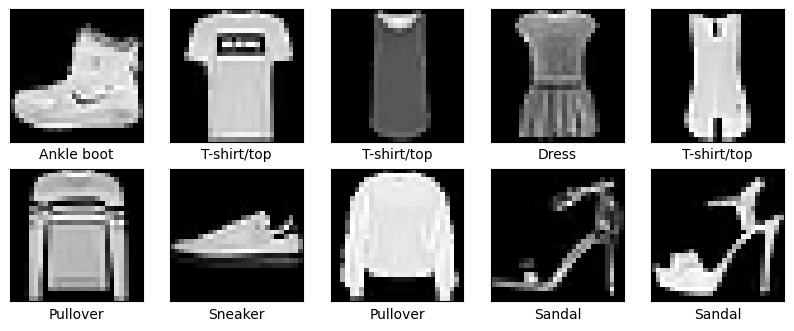

In [6]:
# Мы хотим показать первые 10 картинок из набора данных в виде сетки, чтобы увидеть, как выглядит каждая картинка и какой вид одежды на ней изображён.
plt.figure(figsize=(10, 10))  # Создаём окно для графика размером 10x10 дюймов

for i in range(10):  # Проходим по первым 10 картинкам
  plt.subplot(5, 5, i+1)  # Создаём ячейку в сетке 5x5 для каждой картинки
  plt.xticks([])  # Убираем метки по горизонтальной оси
  plt.yticks([])  # Убираем метки по вертикальной оси
  plt.grid(False)  # Убираем сетку на картинке
  plt.imshow(train_images[i], cmap='gray')  # Показываем картинку в оттенках серого
  plt.xlabel(class_names[train_labels[i]])  # Добавляем название класса (вид одежды) под картинкой


# Мы увидим сетку из 10 картинок и сможем сразу узнать, что изображено на каждой из них, благодаря подписанным названиям классов.

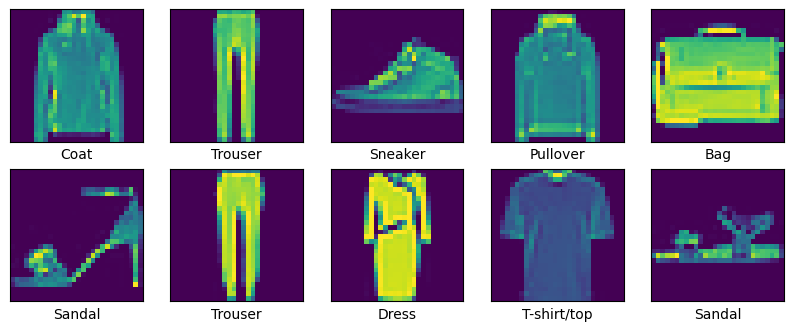

In [7]:
# Мы хотим показать последние 10 картинок из набора данных (и с cmap='viridis')
plt.figure(figsize=(10, 10))  # Создаём окно для графика размером 10x10 дюймов

for i in range(10):  # Проходим по последним 10 картинкам
  plt.subplot(5, 5, i+1)  # Создаём ячейку в сетке 5x5 для каждой картинки
  plt.xticks([])  # Убираем метки по горизонтальной оси
  plt.yticks([])  # Убираем метки по вертикальной оси
  plt.grid(False)  # Убираем сетку на картинке
  img = plt.imshow(train_images[-10 + i], cmap='viridis')  # Показываем картинку с цветной палитрой 'viridis'
  plt.xlabel(class_names[train_labels[-10 + i]])  # Добавляем название класса (вид одежды) под картинкой

# plt.colorbar(img)  # Добавляем цветовую шкалу
plt.show()  # Показываем все картинки

In [8]:
# Мы меняем форму картинок, чтобы они подходили для работы с нейронной сетью.
# Важно, чтобы картинки имели 4 измерения: количество картинок, высота, ширина и количество каналов.
# Зная количество картинок, мы можем правильно изменить форму массива, чтобы подготовить его для обработки нейронной сетью.

def convert_to_tensor(images):
  # Меняем форму картинок, чтобы они имели 4 измерения
  # (первые — количество картинок, остальные — высота, ширина и количество каналов (1 для черно-белых картинок))
  return images.reshape(images.shape[0], 28, 28, 1)

# Применяем функцию ко всем тренировочным картинкам
train_images = convert_to_tensor(train_images)
# Применяем функцию ко всем тестовым картинкам
test_images = convert_to_tensor(test_images)

# Печатаем новую форму тренировочных картинок
print(train_images.shape)
# Печатаем новую форму тестовых картинок
print(test_images.shape)


# Мы увидим новую форму для тренировочных и тестовых картинок, которая должна быть (число картинок, 28, 28, 1).
# Это значит, что каждая картинка теперь имеет 4 измерения, как нужно для работы с нейронными сетями.

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# у нас есть 60,000 тренировочных картинок, каждая размером 28x28 пикселей и черно-белая
# у нас есть 10,000 тестовых картинок, каждая размером 28x28 пикселей и черно-белая.
# Мы подготовили данные: 60,000 картинок для обучения нейронной сети и 10,000 картинок для проверки её работы.

In [10]:
print(f'Min value in train images: {train_images.min()}')
print(f'Max value in train images: {train_images.max()}')
print(f'Min value in test images: {test_images.min()}')
print(f'Max value in test images: {test_images.max()}')

print(f'First pixel value in train images: {train_images[0][0][0][0]}')
print(f'Last pixel value in train images: {train_images[-1][-1][-1][-1]}')

Min value in train images: 0
Max value in train images: 255
Min value in test images: 0
Max value in test images: 255
First pixel value in train images: 0
Last pixel value in train images: 0


In [11]:
# Мы нормализуем значения пикселей картинок, чтобы они были в диапазоне от 0 до 1. Это помогает нейронной сети лучше обучаться.
def normalization(images):
  # Меняем значения пикселей картинок на числа от 0 до 1. Делаем это, чтобы упростить работу нейронной сети
  # images.astype('float32') — преобразует значения пикселей в формат с плавающей точкой (float32). Это важно для точных вычислений.
  # / 255.0 — делит каждое значение пикселя на 255.0, чтобы перевести его в диапазон от 0 до 1.
  return images.astype('float32') / 255.0

# Применяем нормализацию к тренировочным картинкам
train_images = normalization(train_images)
# Применяем нормализацию к тестовым картинкам
test_images = normalization(test_images)

# Печатаем форму тренировочных картинок после нормализации
print(f'Shape of train images: {train_images.shape}')
# Печатаем форму тестовых картинок после нормализации
print(f'Shape of test images: {test_images.shape}')

# Мы увидим, что форма картинок осталась такой же, но значения пикселей теперь от 0 до 1, что улучшает работу модели.

Shape of train images: (60000, 28, 28, 1)
Shape of test images: (10000, 28, 28, 1)


In [12]:
print(f'Min value in train images: {train_images.min()}')
print(f'Max value in train images: {train_images.max()}')
print(f'Min value in test images: {test_images.min()}')
print(f'Max value in test images: {test_images.max()}')

print(f'First pixel value in train images: {train_images[0][0][0][0]}')
print(f'Last pixel value in train images: {train_images[-1][-1][-1][-1]}')

Min value in train images: 0.0
Max value in train images: 1.0
Min value in test images: 0.0
Max value in test images: 1.0
First pixel value in train images: 0.0
Last pixel value in train images: 0.0


In [13]:
# После нормализации значения пикселей картинок изменились с диапазона от 0 до 255 на диапазон от 0 до 1.
# Форма картинок осталась такой же, как и до нормализации.
# До нормализации значения пикселей были от 0 до 255.
# После нормализации значения пикселей стали от 0.0 до 1.0.
# Это значит, что нормализация сделана правильно, и теперь данные готовы для использования в нейронной сети.

In [14]:
# Конвертация целевой переменной в категориальную
# Преобразование чисел, представляющих классы (например, 0, 1, 2), в формат, который понятен для классификации (например, [1, 0, 0], [0, 1, 0], [0, 0, 1]).
# Для того чтобы нейронная сеть могла правильно обрабатывать и классифицировать разные классы.
# В Keras для этого часто используют функцию to_categorical из библиотеки keras.utils.

# Определяем уникальные классы и их количество
# Находим все уникальные классы в тренировочных метках и считаем их количество.
# Нам нужно знать, сколько классов у нас всего, чтобы корректно преобразовать метки.
unique_classes = np.unique(train_labels)
# print(unique_classes) # [0 1 2 3 4 5 6 7 8 9]
NUM_CLASSES = unique_classes.shape[0]
# print(NUM_CLASSES) # 10

# Функция для преобразования меток в категориальный формат
def to_categorical(labels, num_classes):
  # Преобразуем метки в формат one-hot (например, [1, 0, 0] для первого класса)
  return tf.keras.utils.to_categorical(labels, num_classes)

# Применяем функцию к тренировочным меткам
train_labels = to_categorical(train_labels, NUM_CLASSES)
# Применяем функцию к тестовым меткам
test_labels = to_categorical(test_labels, NUM_CLASSES)

# Печатаем форму меток после преобразования
print(train_labels.shape)
print(test_labels.shape)

# Преобразование меток в категориальный формат помогает нейронной сети правильно интерпретировать классы.
# Мы проверяем форму данных, чтобы убедиться, что преобразование выполнено корректно.

(60000, 10)
(10000, 10)


In [15]:
# (60000, 10) и (10000, 10) означает, что у нас 60 000 тренировочных меток и 10 000 тестовых меток.
# Каждая метка теперь представлена 10 значениями (одним для каждого класса). Это значит,
# что каждая метка преобразована в формат one-hot, где одно значение равно 1 (класс), а остальные 0.
# Мы правильно преобразовали метки в категориальный формат, и теперь каждая метка представлена в виде массива длиной 10.

In [16]:
# Этот код помогает остановить обучение модели, если она начинает переобучаться (когда точность на тренировочных данных значительно выше, чем на валидационных).
class myCallback(tf.keras.callbacks.Callback):
  # эта функция выполняется в конце каждой эпохи обучения
  def on_epoch_end(self, epoch, logs={}):
    # Проверяем, если разница между точностью на тренировочных и валидационных данных больше 5%
    # logs.get('accuracy') — получает точность модели на тренировочных данных
    # logs.get('val_accuracy') — получает точность модели на валидационных данных
    if logs.get('accuracy') - logs.get('val_accuracy') >= 0.05 and epoch > 10:
      # Если разница больше 5% и прошли больше 10 эпох, останавливаем обучение
      print(f"\nThe difference between train accuracy and validation more than 5% so cancelling training!")
      # если условие выполнено, останавливаем обучение
      self.model.stop_training = True

callbacks = myCallback()

# Мы создаём механизм для предотвращения переобучения модели,
# автоматически останавливая обучение, если модель слишком хорошо обучилась на тренировочных данных, но плохо на валидационных.

In [17]:
# Чтобы предотвратить излишнее обучение и экономить ресурсы. Если модель уже не улучшает свои результаты, нет смысла продолжать обучение.

# Создаем объект ранней остановки (EarlyStopping)
epoch_callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',          # Следим за точностью модели (accuracy) (Можно также следить за другими метриками, например, потерей (loss))
    patience=10,                 # Если точность не улучшается в течение 10 эпох, остановим обучение
    verbose=1,                   # Выводим сообщения о том, что происходит
    mode='auto',                 # Автоматически определяем, нужно ли увеличивать или уменьшать значение для остановки
    restore_best_weights=False   # Не восстанавливать лучшие веса модели после остановки
)
# Этот объект будет автоматически останавливать обучение модели,
# если точность не улучшится в течение заданного количества эпох. Это поможет вам сделать процесс обучения более эффективным.

In [18]:
# Этот код помогает, когда модель не улучшается. Он снижает скорость обучения, чтобы модель могла лучше обучаться и находить лучшие параметры.

# Создаем объект ReduceLROnPlateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', # Слежка за точностью на валидации. Если она не улучшается, будет действовать редукция.
    factor=0.2, # Если точность на валидации не улучшается, скорость обучения уменьшится в 5 раз (0.2).
    patience=3 # Если точность не улучшается в течение 3 эпох, тогда скорость обучения уменьшится.
)
# Если точность на валидации не улучшается в течение 3 эпох, скорость обучения уменьшится в 5 раз. Это помогает улучшить обучение модели.

In [19]:
# CNN (Convolutional Neural Network) модель
# Этот код создает и описывает модель нейронной сети, которая будет обучаться на изображениях.
# Мы добавляем сверточные слои (Conv2D) для извлечения признаков из изображений,
# слои подвыборки (или слои пула, Pooling layers) для уменьшения размера данных,
# и полносвязные слои (Dense layers) для принятия окончательного решения о классах.
# Создаем модель нейронной сети

model = tf.keras.models.Sequential([

  # Первый сверточный слой
  tf.keras.layers.Conv2D(
      filters=32, # Количество фильтров (32)
      kernel_size=(3, 3), # Размер фильтра (3x3)
      activation='relu', # Функция активации ReLU
      strides=1, # Шаг фильтра
      padding='same', # Размер выходного изображения будет таким же, как и входного
      data_format='channels_last', # Формат данных (каналы в конце)
      input_shape=(28,28,1) # Форма входного изображения (28x28 пикселей, 1 канал)
  ),
  tf.keras.layers.BatchNormalization(), # Нормализация батча

  # Второй сверточный слой
  tf.keras.layers.Conv2D(
      filters=32, # Количество фильтров (32)
      kernel_size=(3, 3), # Размер фильтра (3x3)
      activation='relu', # Функция активации ReLU
      strides=1, # Шаг фильтра
      padding='same', # Размер выходного изображения будет таким же, как и входного
      data_format='channels_last' # Формат данных (каналы в конце)
  ),
  tf.keras.layers.BatchNormalization(), # Нормализация батча
  tf.keras.layers.Dropout(0.25), # Слой Dropout для предотвращения переобучения (25% нейронов выключаются)

  # Третий сверточный слой
  tf.keras.layers.Conv2D(
      filters=64, # Количество фильтров (64)
      kernel_size=(3, 3), # Размер фильтра (3x3)
      activation='relu', # Функция активации ReLU
      strides=1, # Шаг фильтра
      padding='same', # Размер выходного изображения будет таким же, как и входного
      data_format='channels_last' # Формат данных (каналы в конце)
  ),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Подвыборка (2x2)
  tf.keras.layers.Dropout(0.25), # Слой Dropout для предотвращения переобучения (25% нейронов выключаются)

  # Четвертый сверточный слой
  tf.keras.layers.Conv2D(
      filters=128, # Количество фильтров (128)
      kernel_size=(3, 3), # Размер фильтра (3x3)
      activation='relu', # Функция активации ReLU
      strides=1, # Шаг фильтра
      padding='same', # Размер выходного изображения будет таким же, как и входного
      data_format='channels_last' # Формат данных (каналы в конце)
  ),
  tf.keras.layers.BatchNormalization(), # Нормализация батча
  tf.keras.layers.Dropout(0.25), # Слой Dropout для предотвращения переобучения (25% нейронов выключаются)

  # Преобразование 2D в 1D
  tf.keras.layers.Flatten(), # Преобразование выходных данных в один длинный вектор

  # Полносвязные слои
  tf.keras.layers.Dense(512, activation='relu'), # Полносвязный слой с 512 нейронами и активацией ReLU
  tf.keras.layers.BatchNormalization(), # Нормализация батча
  tf.keras.layers.Dropout(0.5), # Слой Dropout для предотвращения переобучения (50% нейронов выключаются)

  tf.keras.layers.Dense(128, activation='relu'), # Полносвязный слой с 128 нейронами и активацией ReLU
  tf.keras.layers.BatchNormalization(), # Нормализация батча
  tf.keras.layers.Dropout(0.5), # Слой Dropout для предотвращения переобучения (50% нейронов выключаются)

  tf.keras.layers.Dense(10, activation='softmax') # Полносвязный слой с 10 нейронами для классификации (10 классов) и активацией softmax
])

# Показываем сводку модели
model.summary()

# Код создает модель нейронной сети с несколькими сверточными слоями, слоями нормализации, подвыборки, и полносвязными слоями.
# Модель подходит для работы с изображениями и будет использоваться для классификации.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,2

 Total params: 13,017,770 (49.66 MB)

 Trainable params: 13,016,106 (49.65 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [20]:
# Этот вывод показывает, как выглядит модель нейронной сети и сколько параметров в каждом слое:
# Conv2D и Dense слои имеют много параметров,(Например conv2d_3 (Conv2D): 73,856 параметров) потому что они обучаются и могут изменяться.
# BatchNormalization слои имеют несколько параметров, (Например batch_normalization_2 имеет 512) но меньше, чем Conv2D и Dense.
# Dropout слои не имеют параметров, их задача — случайно выключать нейроны для предотвращения переобучения.
  # (например, dropout_2, dropout_3, dropout_4) имеют 0 параметров. Это значит, что они не участвуют в обучении,
  # а их задача — просто временно отключать часть нейронов, чтобы модель не переобучалась.
# Total params показывает общее количество параметров в модели, которые будут обучаться.
  # Total params: 13,017,770 (49.66 MB)
# Trainable params — это количество параметров, которые модель будет обучать.
  # Trainable params: 13,016,106 (49.65 MB)
# Non-trainable params — это параметры, которые не будут изменяться во время обучения.
  #  Non-trainable params: 1,664 (6.50 KB)

# Модель содержит много параметров и будет достаточно сложной, что может помочь ей лучше обучаться, но также требует много вычислительных ресурсов.

In [21]:
# Мы подготавливаем модель для обучения, выбирая алгоритм для оптимизации (Adam), функцию потерь и метрики для оценки.(Компиляция модели)
# Мы тренируем модель на наших тренировочных данных, проверяем на тестовых данных и используем колбэки для контроля процесса
# (например, если обучение нужно остановить раньше).(Обучение модели)

# Компилируем модель, выбираем настройки для обучения
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),  # Используем оптимизатор Adam с заданной скоростью обучения 0.003
              loss = 'categorical_crossentropy',  # Указываем, что будем считать потери по методу категорической кросс-энтропии (подходит для многоклассовой классификации)
              metrics=['accuracy'])  # Добавляем метрику для отслеживания точности

# Начинаем обучение модели
history = model.fit(train_images,  # Тренировочные картинки
          train_labels,  # Метки (ответы) для этих картинок
          validation_data=(test_images, test_labels),  # Тестовые картинки и их метки для проверки модели
          batch_size=250,  # Размер партии, т.е. сколько картинок будет обрабатываться за один раз
          epochs=25,  # Сколько раз модель пройдет через все данные (25 эпох)
          callbacks=[callbacks, reduce_lr, epoch_callback])  # Колбэки для управления процессом обучения


# Модель будет обучаться 25 раз (эпох), пытаясь улучшить точность.
# Колбэки помогут остановить обучение, если разница между тренировочной и тестовой точностью станет слишком большой или если модель перестанет улучшаться.

Epoch 1/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7605 - loss: 0.7114 - val_accuracy: 0.1486 - val_loss: 5.0884 - learning_rate: 0.0030
Epoch 2/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8899 - loss: 0.3113 - val_accuracy: 0.7741 - val_loss: 0.6889 - learning_rate: 0.0030
Epoch 3/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9112 - loss: 0.2532 - val_accuracy: 0.9103 - val_loss: 0.2452 - learning_rate: 0.0030
Epoch 4/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9183 - loss: 0.2262 - val_accuracy: 0.9180 - val_loss: 0.2277 - learning_rate: 0.0030
Epoch 5/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9261 - loss: 0.2026 - val_accuracy: 0.9060 - val_loss: 0.2676 - learning_rate: 0.0030
Epoch 6/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9344 - loss: 0.1837 - val_accuracy: 0.9207 - val_loss: 0.2278 - learning_rate: 0.0030
Epoch 7/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9382 - loss

In [22]:
# Вот что можно понять из ↑:
# Показатели модели:
  # Loss (потери) и accuracy (точность) показывают, насколько хорошо модель работает на тренировочных данных и на проверочных данных (validation).
  # loss указывает, насколько модель ошибается в прогнозах. Чем меньше loss, тем лучше модель.
  # accuracy показывает, сколько процентов правильных предсказаний модель сделала. Чем выше accuracy, тем лучше.

# Изменения в течение эпох:
  # Потери (loss) постепенно уменьшаются, что хорошо, так как это значит, что модель учится и ошибки уменьшаются.
  # Точность (accuracy) увеличивается, что также хорошо. Это означает, что модель становится лучше в угадывании правильных ответов.

# Валидация:
  # val_loss и val_accuracy показывают, как модель работает на новых данных, которые она не видела до этого. Здесь тоже наблюдается улучшение, хотя значения колеблются.

# Вывод:
  # Модель обучается хорошо, так как точность растет, а потери уменьшаются. Это означает, что модель становится умнее и лучше делает предсказания.
  # Точность на обучающей выборке улучшалась с каждой эпохой и достигла 94.31%, что говорит о хорошем обучении модели.
  # Точность на проверочной выборке стабилизировалась около 94% после 12-й эпохи, что указывает на то, что модель уже хорошо предсказывает данные.
  # Потери на проверочной выборке (val_loss) достили минимума на 12 эпохе, а потом немного выросли до 0.24, что может свидетельствовать о том, что модель слегка переобучается.
  # Learning rate (скорость обучения) уменьшалась, помогая модели более плавно сходиться.


In [23]:
# Мы запускаем этот код, чтобы проверить, насколько хорошо обученная модель предсказывает результаты на тестовых данных.
# Это поможет понять, насколько модель может работать с реальными данными, которые она не видела.
# model.evaluate — это функция, которая проверяет, насколько хорошо наша модель работает на тестовых данных.
# test_images — это картинки, которые модель ещё не видела. Они нужны, чтобы проверить, как модель справляется с новыми данными.
# test_labels — это правильные ответы для тестовых картинок.

# Оцениваем модель на тестовых данных
model.evaluate(test_images, test_labels)

# Если точность высокая, значит, модель хорошо обучилась. Если низкая — модель может быть недообучена или переобучена.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9420 - loss: 0.2305


[0.2333228588104248, 0.9430999755859375]

In [24]:
# Вот что можно понять из ↑:
# Модель правильно угадывает около 94% картинок. Это хороший результат, значит,
# модель хорошо обучилась. Потери (ошибка) равны 0.2305, что тоже нормально.

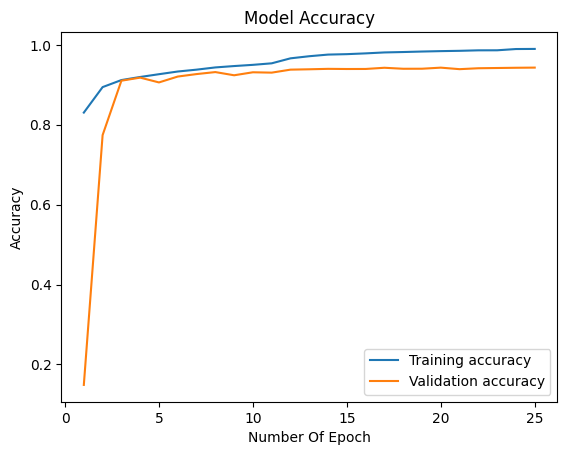

In [25]:
# Мы строим график, чтобы увидеть, как менялась точность модели по мере её обучения.
# Это помогает понять, улучшалась ли модель с каждой эпохой и нет ли разницы между тренировочной и валидационной точностью.

train_accuracy = history.history['accuracy']  # Берём историю точности для тренировочных данных
val_accuracy = history.history['val_accuracy']  # Берём историю точности для валидационных данных
plt.plot(list(range(1, len(train_accuracy) + 1)), train_accuracy, label='Training accuracy')  # Строим график точности обучения
plt.plot(list(range(1, len(val_accuracy) + 1)), val_accuracy, label='Validation accuracy')  # Строим график точности на валидации
plt.legend()  # Показываем легенду, что обозначает каждый график
plt.title('Model Accuracy')  # Название графика — "Точность модели"
plt.xlabel('Number Of Epoch')  # Подпись по оси X — "Количество эпох"
plt.ylabel('Accuracy')  # Подпись по оси Y — "Точность"
plt.show()  # Показываем график
# Если графики тренировки и валидации идут близко друг к другу, значит, модель обучается хорошо и не переобучается.
# Если график тренировки намного выше валидации, модель может переобучиться — это плохо.

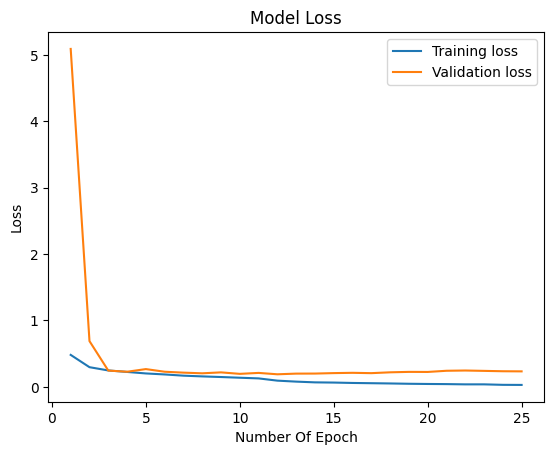

In [26]:
# Мы строим график потерь, чтобы увидеть, как менялась ошибка (потери) модели на каждом шаге обучения.
# Это помогает понять, улучшалась ли модель и не переобучается ли она.

# значения функции потерь на тренировочных данных после каждой эпохи
train_loss = history.history['loss']  # Получаем историю потерь для тренировочных данных
# значения функции потерь на валидационных данных после каждой эпохи.
val_loss = history.history['val_loss']  # Получаем историю потерь для валидационных данных
plt.plot(list(range(1, len(train_loss) + 1)), train_loss, label='Training loss')  # Строим график потерь на тренировке
plt.plot(list(range(1, len(val_loss) + 1)), val_loss, label='Validation loss')  # Строим график потерь на валидации
plt.legend()  # Показываем, что обозначает каждый график
plt.title('Model Loss')  # Название графика — "Потери модели"
plt.xlabel('Number Of Epoch')  # Подпись по оси X — "Количество эпох"
plt.ylabel('Loss')  # Подпись по оси Y — "Потери"
plt.show()  # Показываем график


# Если потери на тренировке и валидации снижаются и идут близко друг к другу, значит, модель обучается хорошо.
# Если потери на валидации намного выше, чем на тренировке, это может означать, что модель переобучилась.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


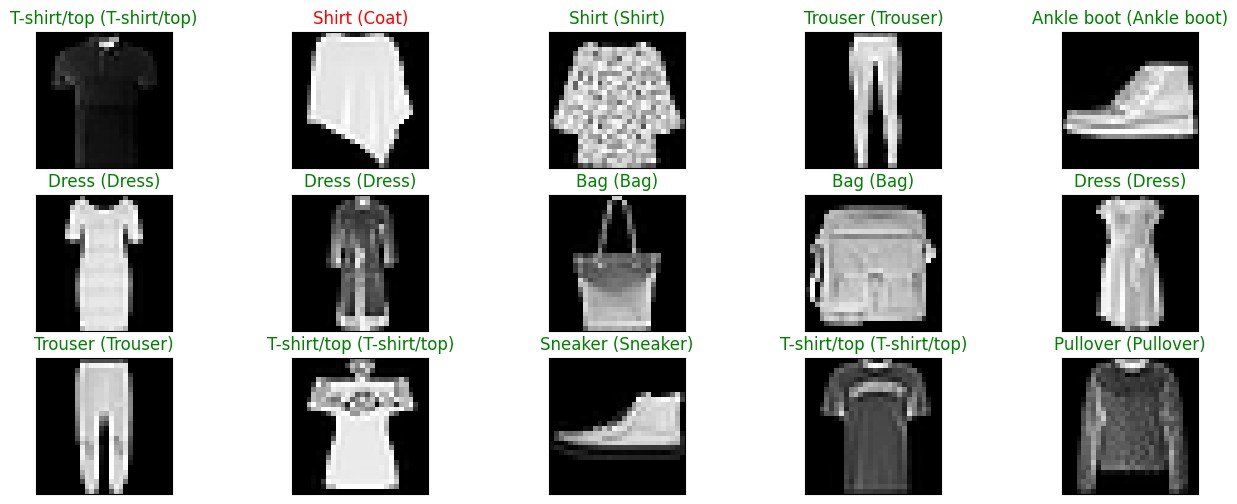

In [27]:
# Чтобы визуально проверить, как хорошо модель предсказывает метки для изображений.
# Мы сравниваем предсказанные метки с реальными и видим, какие изображения модель предсказала правильно, а какие нет.

# Получаем предсказания модели для всех тестовых изображений
predictions = model.predict(test_images)

# Создаем фигуру для графиков, устанавливаем размер изображения
figure = plt.figure(figsize=(16, 6))

# Случайным образом выбираем 15 изображений из тестового набора
display_images = np.random.choice(test_images.shape[0], size=15, replace=False)

# Проходим по выбранным изображениям
for i, index in enumerate(display_images):
    # Добавляем изображение на график
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    # Отображаем изображение в градациях серого
    ax.imshow(test_images[index], cmap='gray')

    # Находим индекс предсказанной метки для текущего изображения
    predict_index = np.argmax(predictions[index])

    # Находим индекс реальной метки для текущего изображения
    true_index = np.argmax(test_labels[index])

    # Устанавливаем заголовок для изображения: показываем предсказанную и реальную метку
    # Заголовок зеленый, если предсказание верное, красный, если нет
    ax.set_title("{} ({})".format(class_names[predict_index], class_names[true_index]),
                  color=("green" if predict_index == true_index else "red"))


# Мы можем увидеть, какие изображения модель распознала правильно, а какие — нет. Это помогает понять, насколько хорошо работает модель.

In [28]:
# Мы создаем отчет, который показывает, как хорошо модель распознает каждый класс.
# В отчете будут показаны такие метрики, как точность, полнота и F1-мера для каждого класса.

# Находим метки классов для каждого изображения в тестовых данных по предсказаниям модели
predicted_labels = np.argmax(predictions, axis=1)

# Находим реальные метки классов для тестовых данных
true_labels = np.argmax(test_labels, axis=1)

# Создаем отчет о качестве классификации
# Сравниваем реальные метки с предсказанными и показываем результаты
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Печатаем отчет
print(report)
# Из отчета можно увидеть, какие классы модель распознает хорошо, а какие плохо, и где есть ошибки. Это поможет понять, как улучшить модель.

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.90      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.91      0.92      0.92      1000
       Dress       0.94      0.94      0.94      1000
        Coat       0.90      0.93      0.91      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.84      0.81      0.82      1000
     Sneaker       0.97      0.98      0.98      1000
         Bag       1.00      0.99      0.99      1000
  Ankle boot       0.98      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [29]:
# Из этого отчета ↑ можно сделать следующие выводы:
# Модель хорошо распознаёт все типы одежды.
# Самый лучший результат у Trouser, Sandal и Bag — почти всегда правильно. Самая слабая точность у Shirt — иногда ошибается. В целом, точность модели — 94%

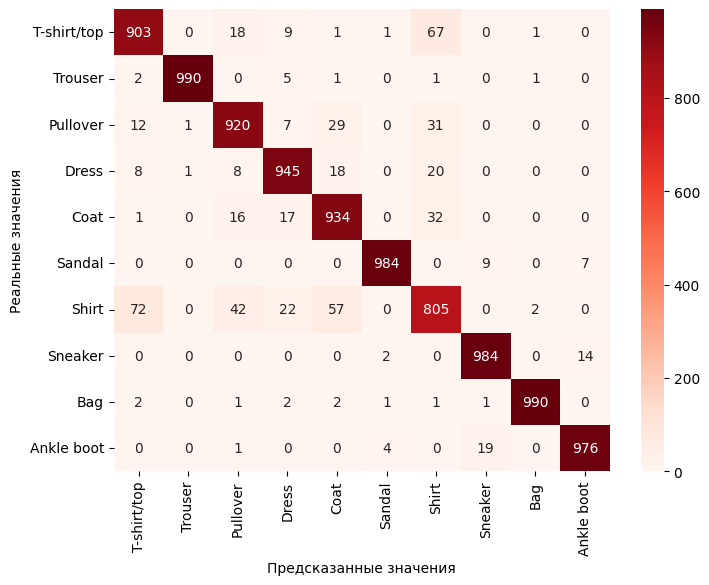

In [30]:
# Мы строим матрицу ошибок, чтобы визуально увидеть, как часто модель ошибается, классифицируя изображения. Это помогает понять, какие классы модель путает.
# Создаем матрицу ошибок, которая показывает, сколько раз модель ошиблась в классификации
cm = confusion_matrix(true_labels, predicted_labels)

# Настраиваем размер картинки
plt.figure(figsize=(8, 6))

# Отображаем матрицу ошибок в виде тепловой карты
# annot=True — показываем числа в ячейках
# fmt='d' — форматируем числа как целые
# cmap='Reds' — используем красную цветовую карту
# xticklabels и yticklabels — имена классов по осям
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)

# Названия осей
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')

# Показываем картинку
plt.show()

# Из матрицы ошибок можно увидеть, какие классы модель распознает хорошо, а какие плохо, и где чаще всего делает ошибки. Это помогает улучшить модель.

In [31]:
# Как видим CNN модель должна быть на 4% выше FCNN (с предыдущего ДЗ). Согласно результатам Classification Report и Confusion Matrix,
# Модель хорошо распознаёт все типы одежды.
# Самый лучший результат у Trouser, Bag, Sandal, Sneaker — почти всегда правильно. Самая слабая точность у Shirt — иногда ошибается. В целом, точность модели — 94%

# With Image Augmenation

In [32]:
# Image Augmenation (Увеличение изображений) — это способ изменить изображения, чтобы модель увидела больше разных примеров. Например, можно повернуть,
# увеличить или уменьшить изображение, поменять его цвет или освещение. Это помогает модели лучше учиться и работать лучше.

In [33]:
# Класс ImageDataGenerator используется для создания и управления потоками изображений.
# Он помогает подготовить данные для обучения модели, применяя различные преобразования и аугментации, такие как вращение, увеличение яркости и масштабирование.

# Импортируем класс ImageDataGenerator из библиотеки TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Этот код подключает инструмент, который поможет подготовить изображения для обучения модели, улучшая их разнообразие и помогая модели стать более точной.

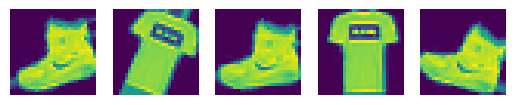

In [34]:
# Этот код показывает, как можно применить аугментацию изображений для увеличения разнообразия тренировочных данных.
# Это помогает улучшить способность модели обучаться и делать предсказания.

# Создаем объект ImageDataGenerator с параметрами аугментации
# rotation_range=50: поворачивает изображения на случайный угол до 50 градусов
# width_shift_range=0.01: случайное смещение изображения по ширине на до 1% от ширины
# height_shift_range=0.01: случайное смещение изображения по высоте на до 1% от высоты
data_augmentor = ImageDataGenerator(rotation_range=50,
                                    width_shift_range=0.01,
                                    height_shift_range=0.01)

# Применяем аугментацию к тренировочным изображениям
data_augmentor.fit(train_images)

# Создаем генератор для получения аугментированных изображений
# Выбираем первые 2 изображения из тренировочных данных и задаем размер пакета 1
augment = data_augmentor.flow(train_images[:2], batch_size=1)

# Отображаем 5 аугментированных изображений
for i in range(1, 6):
    plt.subplot(1,5, i)  # Размещаем 5 изображений в одном ряду
    plt.imshow(next(augment)[0].squeeze())    # Получаем следующее изображение и убираем лишние размеры
    plt.axis('off')  # Отключаем оси
plt.show()  # Показываем изображения


# Мы видим, что изображения были изменены в соответствии с заданными параметрами аугментации.
# Это может помочь модели лучше справляться с разными вариациями изображений в реальных данных.

In [35]:
# Этот код создает генератор для аугментации изображений, который будет случайным образом изменять изображения.
# Это поможет улучшить обучение модели, создавая разнообразные варианты изображений.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создаем генератор для аугментации изображений
generator = ImageDataGenerator(
    featurewise_center=False,  # Не вычитает среднее значение по всему набору данных
    samplewise_center=False,  # Не вычитает среднее значение для каждого изображения
    featurewise_std_normalization=False,  # Не делит изображения на стандартное отклонение набора данных
    samplewise_std_normalization=False,  # Не делит каждое изображение на его стандартное отклонение
    zca_whitening=False,  # Не применяет снижение размерности
    rotation_range=0.1,  # Поворачивает изображения на случайный угол до 10%
    zoom_range=0.1,  # Случайно увеличивает или уменьшает изображения до 10%
    width_shift_range=0.1,  # Случайно смещает изображения по горизонтали на до 10%
    height_shift_range=0.1,  # Случайно смещает изображения по вертикали на до 10%
    horizontal_flip=False,  # Не переворачивает изображения по горизонтали
    vertical_flip=False    # Не переворачивает изображения по вертикали
)

# Создаем генераторы для тренировочных и тестовых данных
train_batches = generator.flow(train_images, train_labels)
val_batches = generator.flow(test_images, test_labels)

# Генератор настроен на выполнение базовой аугментации изображений, что позволит модели лучше обобщать и справляться с различными изменениями в изображениях.

In [48]:
# Этот код обучает модель на данных, которые были случайным образом изменены (аугментированы).
# Это помогает модели лучше учиться и улучшает её способность работать с разными вариантами изображений.

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.003),  # Используем оптимизатор Adam с темпом обучения 0.003
    loss='categorical_crossentropy',  # Функция потерь для многоклассовой классификации
    metrics=['accuracy']  # Будем отслеживать точность модели
)

# Обучаем модель на аугментированных данных
history_aug = model.fit(
    train_batches,  # Используем данные с аугментацией для обучения
    epochs=25,  # Обучаем модель 25 эпох
    # batch_size=250,  # Размер батча для обучения TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'workers'
    validation_data=val_batches,  # Используем данные с аугментацией для проверки
    callbacks=[callbacks, epoch_callback, reduce_lr],  # Используем колбэки для управления обучением
    # use_multiprocessing=True  # Используем многопроцессорность для ускорения обучения TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'workers'
)

# Модель обучается на данных с аугментацией и проверяется на тех же данных с аугментацией.
# Использование колбэков помогает контролировать обучение, а многопроцессорность ускоряет процесс.

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 19ms/step - accuracy: 0.9065 - loss: 0.2583 - val_accuracy: 0.9195 - val_loss: 0.2249 - learning_rate: 0.0030
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 17ms/step - accuracy: 0.9103 - loss: 0.2536 - val_accuracy: 0.9160 - val_loss: 0.2311 - learning_rate: 0.0030
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9120 - loss: 0.2485 - val_accuracy: 0.9156 - val_loss: 0.2287 - learning_rate: 0.0030
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9110 - loss: 0.2502 - val_accuracy: 0.9171 - val_loss: 0.2261 - learning_rate: 0.0030
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9155 - loss: 0.2361 - val_accuracy: 0.9246 - val_loss: 0.2109 - learning_rate: 6.0000e-04
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9201 - loss: 0.2229 - val_accuracy: 0.9275 - val_loss: 0.2032 - learning_rate: 6.0000e-04
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step 

In [37]:
# Из этого ↑ можно сделать следующие выводы:
# Модель училась 10 эпох и показала хороший результат. Точность на обучающих данных — 92.71%, на проверочных данных — 92.71%.
# Это значит, что модель стала лучше понимать данные и правильно их классифицировать.

# "Early stopping" остановил обучение, потому что улучшения стали происходить медленно, и модель уже достигла хорошего результата.

In [49]:
# Мы запускаем этот код, чтобы узнать, насколько хорошо модель умеет делать прогнозы на новых данных. Это помогает понять, насколько она хорошо обучилась.

# model.evaluate: Эта функция проверяет, как хорошо модель работает на новых данных, которые она не видела раньше.
# test_images: Изображения, на которых мы проверяем модель.
# test_labels: Правильные ответы для этих изображений.
model.evaluate(test_images, test_labels)
# Результат покажет, насколько точно модель может предсказывать классы для изображений из тестового набора.
# Если результаты хорошие, значит модель обучилась хорошо. Если нет — нужно улучшить обучение или данные.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9390 - loss: 0.1743


[0.1725110113620758, 0.9391000270843506]

In [50]:
# Из этого ↑ можно сделать следующие выводы:
# Модель имеет точность 93.9%. Это значит, что она правильно классифицировала 93.9% изображений.
# Потери (loss) равны 0.1743. Чем меньше это число, тем лучше модель справляется с задачей.
# В целом, модель показывает хорошие результаты!

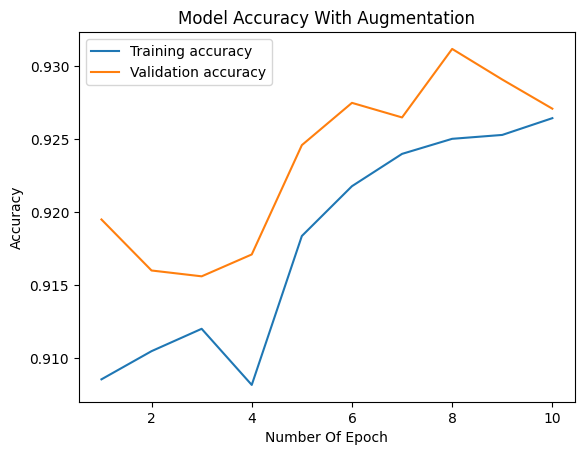

In [51]:
# Мы создаем график, чтобы увидеть, как улучшалась точность модели на обучении и проверке на каждой эпохе.
# Это помогает понять, улучшилась ли модель после применения увеличения данных.

# train_accuracy и val_accuracy: Хранят данные о точности модели на обучающих и проверочных данных на каждой эпохе.
train_accuracy = history_aug.history['accuracy']
val_accuracy = history_aug.history['val_accuracy']

# Создаем график точности модели на обучении и проверке. Одна линия для точности на обучении, другая для точности на проверке.
plt.plot(list(range(1, len(train_accuracy) + 1)), train_accuracy, label='Training accuracy')
plt.plot(list(range(1, len(train_accuracy) + 1)), val_accuracy, label='Validation accuracy')

plt.legend()  # Добавляем легенду, Показывает, что за линия на графике.
plt.title('Model Accuracy With Augmentation')  # Заголовок графика
plt.xlabel('Number Of Epoch')  # Подпись оси X
plt.ylabel('Accuracy')  # Подпись оси Y
plt.show()  # Показываем график

# С графика может показать, насколько хорошо модель обучалась и улучшилась ли она после использования увеличения данных.
# Если точность на обучении и проверке увеличивается, это значит, что модель стала лучше.

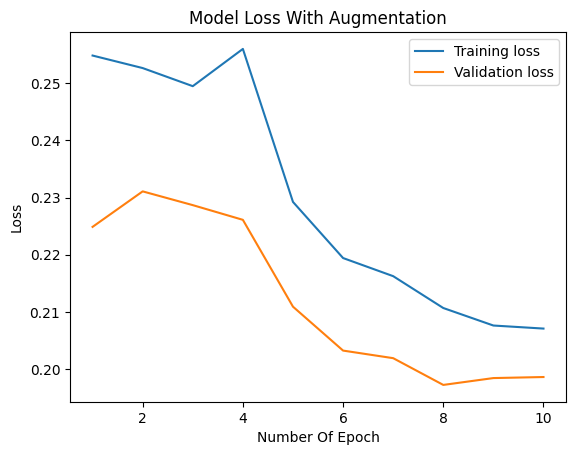

In [52]:
# Мы создаем график, чтобы увидеть, как изменялись потери модели на обучении и проверке на каждой эпохе.
# Это помогает понять, улучшилась ли модель после использования увеличения данных.

# train_loss и val_loss: Хранят данные о потерях модели на обучении и проверке на каждой эпохе.
train_loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

# Создаем график потерь модели на обучении и проверке. Одна линия для потерь на обучении, другая для потерь на проверке.
plt.plot(list(range(1, len(train_loss) + 1)), train_loss, label='Training loss')
plt.plot(list(range(1, len(train_loss) + 1)), val_loss, label='Validation loss')

plt.legend()  # Добавляем легенду, Показывает, что за линия на графике.
plt.title('Model Loss With Augmentation')  # Заголовок графика
plt.xlabel('Number Of Epoch')  # Подпись оси X
plt.ylabel('Loss')  # Подпись оси Y
plt.show()  # Показываем график

# С графика можно увидеть, насколько хорошо модель улучшила свои потери. Если потери уменьшаются, это значит, что модель стала лучше.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


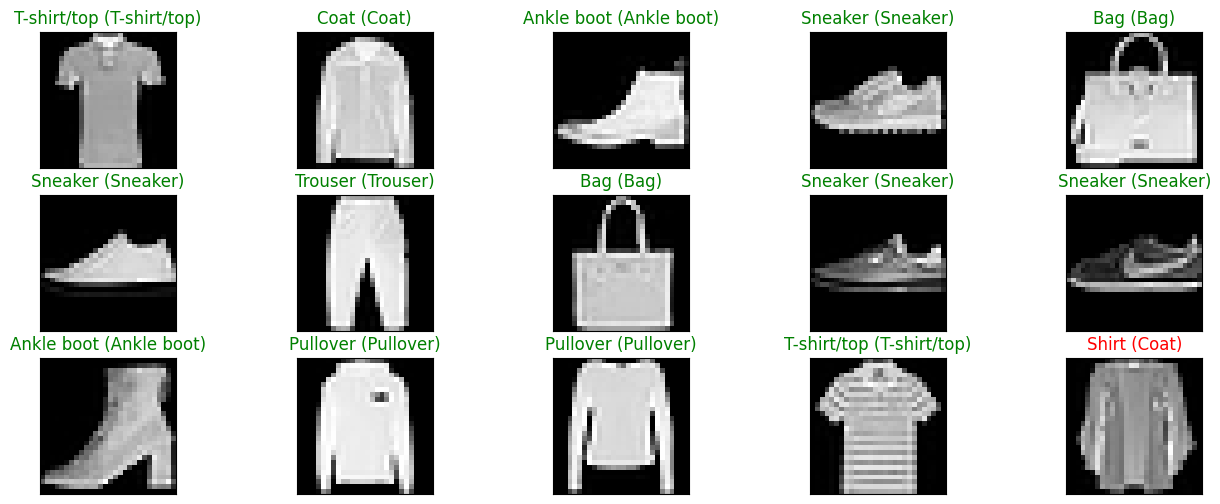

In [53]:
# Мы отображаем изображения с их предсказанными и истинными метками, чтобы увидеть, как хорошо модель делает предсказания.
# Это помогает визуально проверить работу модели.

predictions = model.predict(test_images)  # Получаем предсказания модели для тестовых изображений

figure = plt.figure(figsize=(16, 6))  # Создаем пустую фигуру для отображения изображений
display_images = np.random.choice(test_images.shape[0], size=15, replace=False)  # Выбираем случайные 15 изображений из теста

# Для каждого выбранного изображения
for i, index in enumerate(display_images):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])  # Создаем подграфик для изображения
    ax.imshow(test_images[index], cmap='gray')  # Отображаем изображение в оттенках серого
    predict_index = np.argmax(predictions[index])  # Находим индекс самого вероятного класса из предсказаний
    true_index = np.argmax(test_labels[index])  # Находим индекс настоящего класса из тестовых меток
    # Устанавливаем заголовок подграфика: предсказанный класс (истинный класс)
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))  # Цвет заголовка зеленый, если правильно, красный, если ошибся

# Мы можем увидеть, какие предсказания правильные (зеленый) и какие неправильные (красный). Это помогает понять, насколько точно модель распознает изображения.

In [54]:
# Мы хотим узнать, насколько хорошо модель предсказывает правильные классы для тестовых изображений.
# Отчет показывает, сколько правильных и неправильных предсказаний сделала модель.

predicted_labels = np.argmax(predictions, axis=1)  # Преобразуем предсказания модели в метки классов (например, 0, 1, 2 и т.д.)
true_labels = np.argmax(test_labels, axis=1)  # Преобразуем истинные метки в классы (например, 0, 1, 2 и т.д.)

report = classification_report(true_labels, predicted_labels, target_names=class_names)  # Создаем отчет о качестве предсказаний модели
print(report)  # Печатаем отчет

# Отчет поможет увидеть, как хорошо модель работает для каждого класса. Мы узнаем, где модель делает больше ошибок и где она работает хорошо.

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.87      0.89      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.93      0.91      0.92      1000
       Dress       0.94      0.93      0.94      1000
        Coat       0.90      0.92      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.84      0.82      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.99      0.96      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [55]:
# Из этого ↑ можно сделать следующие выводы:
# Точность (accuracy): Модель правильно классифицировала 94% изображений.
# Precision (точность): Наиболее высокая точность у моделей для Trouser, Sandal, Bag, Ankle boot (почти 100%).
# Recall (полнота): Наиболее высокая полнота у моделей для Bag, Sandal и Trouser (почти 100%).
# F1-score: Хороший баланс между точностью и полнотой, особенно у Trouser, Sandal, Bag.
# Вывод: Модель хорошо справляется с задачей, но наименее точно распознает Shirt.

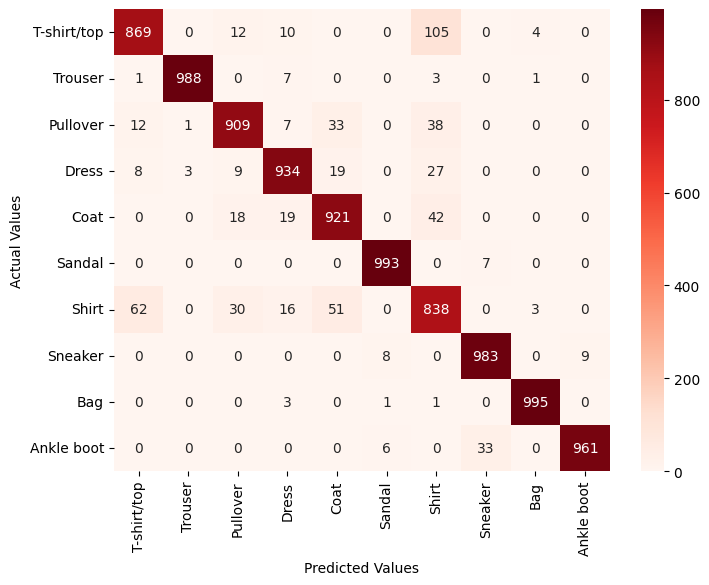

In [56]:
# Мы используем матрицу ошибок, чтобы увидеть, как часто модель путает один класс с другим. Это помогает понять, в каких классах модель делает больше ошибок.
cm = confusion_matrix(true_labels, predicted_labels)  # Создаем матрицу ошибок, которая показывает, сколько раз модель ошиблась

plt.figure(figsize=(8, 6))  # Создаем рисунок с размером 8x6 дюймов
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
# Рисуем тепловую карту матрицы ошибок. annot=True показывает числа в ячейках, fmt='d' - формат для целых чисел,
# cmap='Reds' - цветовая палитра. class_names используются для подписей по осям

plt.xlabel('Predicted Values')  # Подпись для оси X
plt.ylabel('Actual Values')     # Подпись для оси Y
plt.show()  # Показываем рисунок

# Матрица ошибок показывает, где модель ошибается чаще всего и как хорошо она распознает разные классы. Можно увидеть, какие классы модель путает между собой.

In [46]:
# Как видим CNN точнее на 4% посравнению с  FCNN (с предыдущего ДЗ). Согласно результатам Classification Report и Confusion Matrix,
# Точность (accuracy): Модель правильно классифицировала 94% изображений.
# Precision (точность): Наиболее высокая точность у моделей для Trouser, Sandal, Bag, Ankle boot (почти 100%).
# Recall (полнота): Наиболее высокая полнота у моделей для Bag, Sandal и Trouser (почти 100%).
# F1-score: Хороший баланс между точностью и полнотой, особенно у Bag, Sandal и Trouser.
# Вывод: Модель хорошо справляется с задачей, но наименее точно распознает Shirt.

# В нашем случае набор данных Fashion MNISTб состоит из изображений предметов одежды в градациях серого с четко определенными формами и характеристиками),
# поэтому вполне возможно, что CNN без дополнений (Image Augmentation) работает хорошо благодаря своей свойственной способности учиться на данных.